<a href="https://colab.research.google.com/github/anqi-guo/udacity-dsnd-blog-post/blob/main/listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/My Drive/study/DSND/airbnb'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
df_ny = pd.read_csv(f'{DATA_PATH}/data/listings-202112.csv')
df_sh = pd.read_csv(f'{DATA_PATH}/data/listings-202112-sh.csv')

df_dict = {'ny':df_ny, 'sh':df_sh}

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
df_dict['ny'].shape, df_dict['sh'].shape

((38277, 18), (29165, 18))

In [30]:
df_dict['ny'].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,338,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,75,1,409,2021-10-22,4.86,1,194,32,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.52,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,123,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,507,2021-11-08,3.68,1,192,33,NaN


In [31]:
df_dict['ny'].dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [32]:
df_dict['ny']['id'].nunique(), df_dict['sh']['id'].nunique()

(38277, 29165)

In [33]:
# unify currency to us dollar
df_dict['sh']['price'] = df_dict['sh']['price'] * .15

# Price distributions

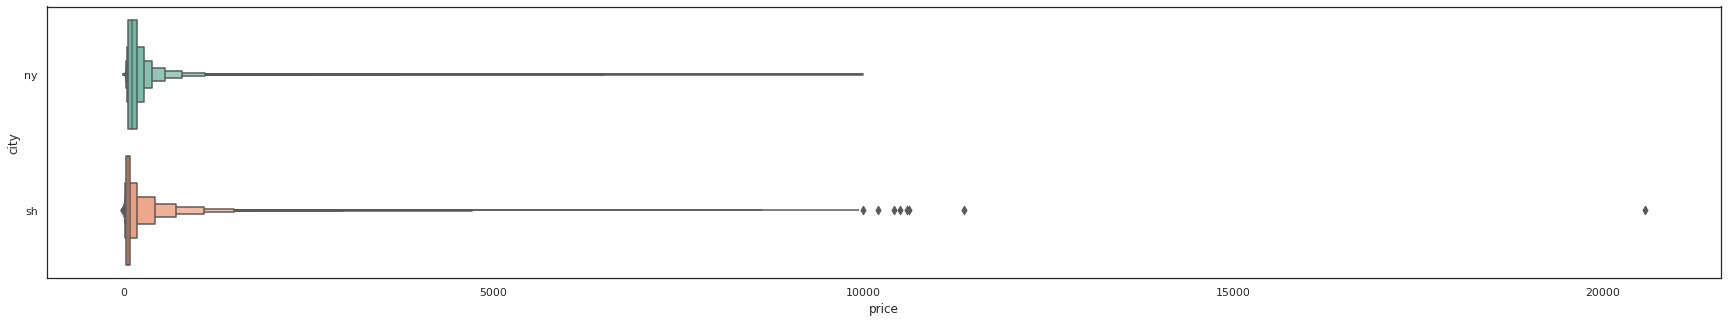

In [34]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,5)}, style="white", palette="Set2")

df_list = []
for city, df in df_dict.items():
  df['city'] = city
  df_list.append(df)

big_df = pd.concat(df_list)

sns.boxenplot(data=big_df, y='city', x='price');

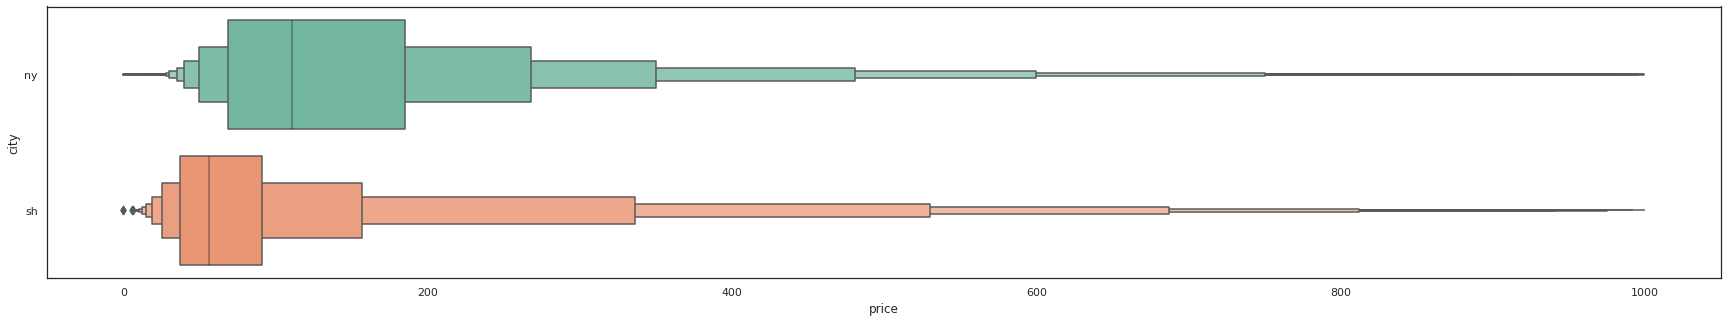

In [35]:
big_df2 = big_df.query('price < 1000')
sns.boxenplot(data=big_df2, y='city', x='price');

Generally, price of listings in New York City is higher than that in Shanghai. The median price in New York City is slightly above 100 dollars, where as the median price in Shanghai is slightly above 50 dollars.

# Median price in each district

In [36]:
df_dict['ny'].groupby('neighbourhood_group')['price'].median().sort_values(ascending=False)

neighbourhood_group
Manhattan        150.0
Brooklyn          99.0
Staten Island     88.0
Queens            77.0
Bronx             75.0
Name: price, dtype: float64

In [37]:
df_dict['sh'].groupby('neighbourhood')['price'].median().sort_values(ascending=False)

neighbourhood
崇明区 / Chongming District    117.750
青浦区 / Qingpu District        70.875
黄浦区 / Huangpu District       70.200
金山区 / Jinshan District       67.350
徐汇区 / Xuhui District         66.750
浦东新区 / Pudong                55.500
静安区 / Jing'an District       54.150
长宁区 / Changning District     53.550
虹口区 / Hongkou District       52.425
杨浦区 / Yangpu District        45.750
普陀区 / Putuo District         45.300
松江区 / Songjiang District     43.200
闵行区 / Minhang District       42.000
奉贤区 / Fengxian District      41.850
嘉定区 / Jiading District       40.200
宝山区 / Baoshan District       36.300
Name: price, dtype: float64

Not surprisingly, rooms in Manhattan are the most expensive ones. However, average price of rooms in Chongming District is highest in Shanghai, and I guess it is because the most of the rooms in Chongming District are villas.

In [38]:
data = df_dict['sh'][df_dict['sh']['neighbourhood'].str.contains("崇明区")]

data.sort_values(by='price', inplace=True)
data[['name','price']].tail(10)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,name,price
4192,16-28人团建最佳选择,1530.00
8522,【久居·崇明】整套\民宿自驾游距上海1小时候\划船垂钓采摘烧烤电影酒吧KTV麻将棋牌,1553.55
27792,【花筑】崇明岛森林公园|长兴岛|近花博会|包栋|明珠湖|烧烤|带娃爱住|整栋,1558.35
28581,崇宿.怡居黄公馆/崇明岛/东平森林公园/景区半价游/亲子游/棋牌ktv/整栋花园11室（免费早餐）,1569.60
20004,悦漫花居花园民宿 （近万达、西沙湿地、森林公园花博会）,1778.40
20046,"崇明岛独立入口水景三人间或双人间,可提供餐饮服务,可接待40人以上团队",1800.00
5589,追梦人客栈,1800.00
22137,香榭璞苑日式民宿,2014.35
15171,【上海隐墅-观云悦舍别墅】崇明独栋豪华别墅/1080平轰趴别墅/棋牌/烧烤/KTV/钓鱼,2640.30
9879,简约居室,5970.00


By the name we can see that listings with highest price in Chongming District are primarily villas, some can even accomodate more than 40 people.

# Which neighbourhood have most rooms?

In [39]:
df_dict['ny']['neighbourhood_group'].value_counts(normalize=True)

Manhattan        0.438409
Brooklyn         0.384461
Queens           0.139065
Bronx            0.028842
Staten Island    0.009222
Name: neighbourhood_group, dtype: float64

In [40]:
df_dict['sh']['neighbourhood'].value_counts(normalize=True)

浦东新区 / Pudong               0.380045
黄浦区 / Huangpu District      0.112121
徐汇区 / Xuhui District        0.086028
崇明区 / Chongming District    0.066450
静安区 / Jing'an District      0.059558
闵行区 / Minhang District      0.052632
青浦区 / Qingpu District       0.043271
松江区 / Songjiang District    0.041385
长宁区 / Changning District    0.029727
嘉定区 / Jiading District      0.027190
虹口区 / Hongkou District      0.024550
杨浦区 / Yangpu District       0.023727
宝山区 / Baoshan District      0.020195
普陀区 / Putuo District        0.016492
奉贤区 / Fengxian District     0.010629
金山区 / Jinshan District      0.006000
Name: neighbourhood, dtype: float64

Most rooms in New York city are located in Manhattan, and most rooms in Shanghai are located in Pudong District. In my opinion, it is because Manhattan is the center of New York city, both for traveling and business, whereas Pudong district is large in area as well as the most populous district in Shanghai.

In [52]:
import folium
import pandas as pd

# Manhattan latitude and longitude values
latitude = 40.71
longitude = -74.00

# Create map and display it
#man_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map of Manhattan
#man_map

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
data = df_dict['ny'].sort_values(by='price', ascending=False).head(100)
data['name'] = data['name'].astype('str')
'''
for lat, lng, in zip(data.latitude, data.longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )
'''
# Add incidents to map
nyc_map = folium.Map(location=[latitude, longitude], zoom_start=12)
#man_map.add_child(incidents)

# add pop-up text to each marker on the map
latitudes = list(data.latitude)
longitudes = list(data.longitude)
labels = list(data.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(nyc_map)    
    
# add incidents to map
nyc_map.add_child(incidents)


The 100 most expenses listings in New York City are mostly located in Manhattan

In [53]:
# Shanghai latitude and longitude values
latitude = 31.23
longitude = 121.47

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
data = df_dict['sh'].sort_values(by='price', ascending=False).head(100)
data['name'] = data['name'].astype('str')

# Add incidents to map
sh_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add pop-up text to each marker on the map
latitudes = list(data.latitude)
longitudes = list(data.longitude)
labels = list(data.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sh_map)    
    
# add incidents to map
sh_map.add_child(incidents)

The 100 most expensive listings in Shanghai are concentrated in 2 area, one being downtown Puxi, and another being Disneyland.

# How many rooms does each host have?

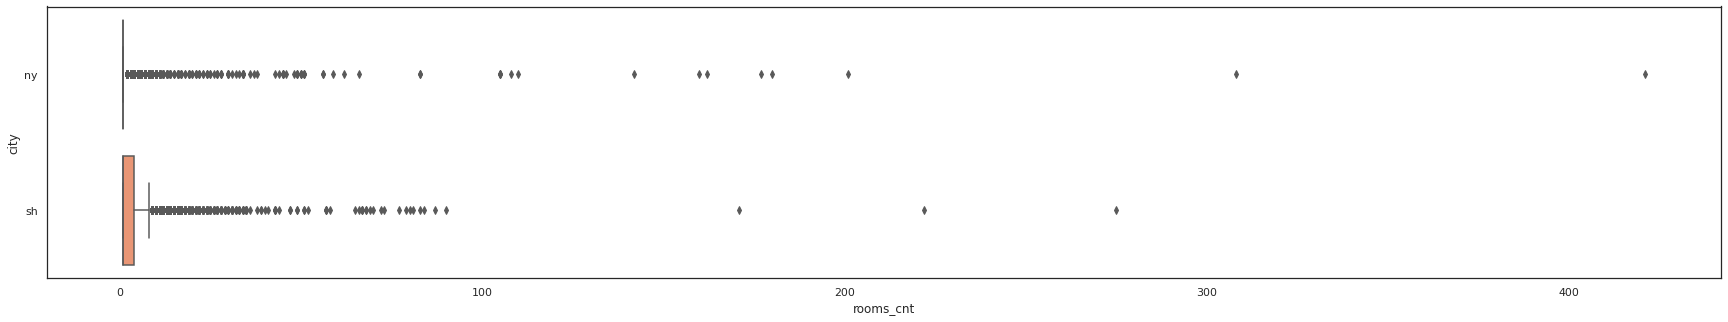

In [ ]:
import seaborn as sns

rooms_cnt_list = []
for city, df in df_dict.items():
  g = df['host_id'].value_counts().to_frame('rooms_cnt')
  g['city'] = city
  rooms_cnt_list.append(g)

big_df = pd.concat(rooms_cnt_list, ignore_index=True)

sns.set(rc={'figure.figsize':(30,5)}, style="white", palette="Set2")
sns.boxplot(data=big_df, x='rooms_cnt', y='city');

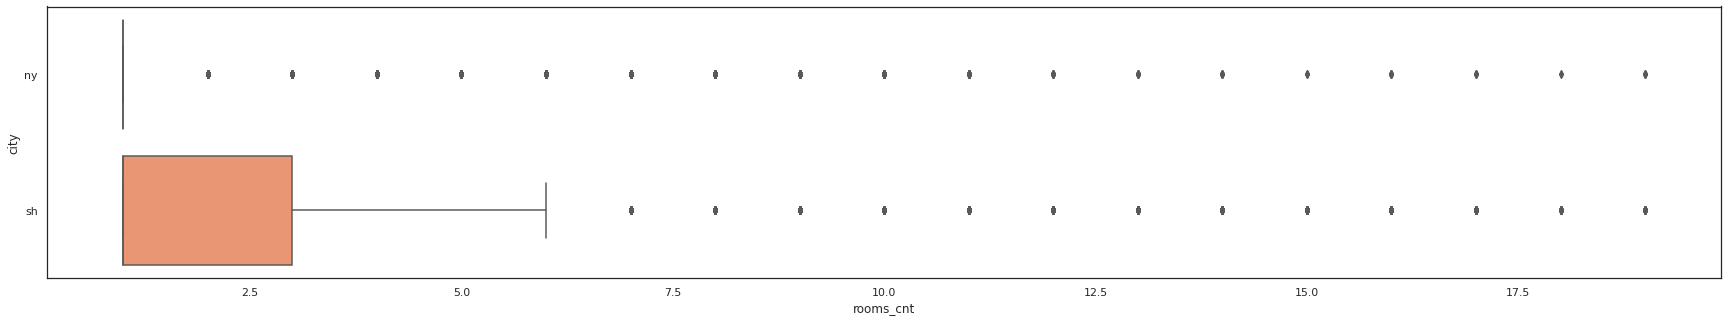

In [ ]:
big_df2 = big_df.query('rooms_cnt < 20')
sns.boxplot(data=big_df2, x='rooms_cnt', y='city');

Majority of hosts in New York have only one room for rent, and majority of hosts in Shanghai have 1 to 3 rooms for rent.